I had tried this project on EfficientDet D1 in TFOD 2.0 api. I had followed many notebooks, discussion, and blogs. I had used almost 7 types of Bounding box augmentation here. The notebooks I had followed for this:<br>
1) https://www.kaggle.com/code/khanhlvg/cots-detection-w-tensorflow-object-detection-api   <br>
2)https://www.kaggle.com/code/ravishah1/cots-faster-rcnn-training-w-tf-2-0-od-api-0-474/notebook  <br>
3) https://www.kaggle.com/code/datastrophy/cots-tfod2-api-setup-faster-rcnn <br>

4) https://www.kaggle.com/code/khanhlvg/inference-using-efficientdet-d0-model-tensorflow <br> 

5) https://www.kaggle.com/code/andradaolteanu/greatbarrierreef-full-guide-to-bboxaugmentation <br>

Discussion helped me lot <br> 

1) https://www.kaggle.com/competitions/tensorflow-great-barrier-reef/discussion/296976

Blog I followed: <br>

1) https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/ <br>

2) https://stackoverflow.com/questions/44906317/what-are-possible-values-for-data-augmentation-options-in-the-tensorflow-object

I had already download the dataset to my google drive and mount the drive here

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Tensorflow Developer/COTS

/content/drive/MyDrive/Tensorflow Developer/COTS


In [ ]:
!pip install tensorflow-gpu==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 24 kB/s 
     |████████████████████████████████| 1.3 MB 56.1 MB/s 
     |████████████████████████████████| 463 kB 70.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires ker

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

I had already cloned tensorflow models

In [ ]:
cd models/research

/content/drive/MyDrive/Tensorflow Developer/COTS/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

Here, I had also cloned coco api git

In [ ]:
cd cocoapi/PythonAPI

/content/drive/MyDrive/Tensorflow Developer/COTS/models/research/cocoapi/PythonAPI


In [ ]:

!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
       ^~~
../common/maskApi.c:46:49: not

In [ ]:
pwd

'/content/drive/MyDrive/Tensorflow Developer/COTS/models/research/cocoapi/PythonAPI'

In [ ]:
cp -r pycocotools /content/drive/MyDrive/Tensorflow Developer/COTS/models/research

cp: target 'Developer/COTS/models/research' is not a directory


In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS/models/research/cocoapi


In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS/models/research


In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS/models


In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS


I had edited setup.py 

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install --use-feature=2020-resolver .
#python -m pip install -q .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/Tensorflow Developer/COTS/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1693294 sha256=b6ede0c58ed919ff9a992cf47bf8820c65c3e01f4c5eed2525992008d26183d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wdsxrrsx/wheels/3d/81/b8/99b43981ce175faf4e95e1b5a75b9d07634b03a091c55cec30
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=dec4c8cf1c7de92dc8da3afa59a16743acf13f19532727b029aa02d211a0384b
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=e37233cbedad91fcdfb72f97fcf15f76f93673c98cf3858d6e95f7be2dabbf58
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [ ]:
cd models/research

/content/drive/MyDrive/Tensorflow Developer/COTS/models/research


In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-10 14:48:58.124675: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0610 14:48:58.356200 139843607033728 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
I0610 14:48:58.722016 139843607033728 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.49s
I0610 14:48:59.215202 139843607033728 test_u

In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS/models


In [ ]:
cd ..

/content/drive/MyDrive/Tensorflow Developer/COTS


In [ ]:
import contextlib2
import io
import IPython
import json
import numpy as np
import os
import pathlib
import pandas as pd
import sys
import tensorflow as tf
import time

from PIL import Image, ImageDraw

# Import the library that is used to submit the prediction result.
INPUT_DIR = '/content/drive/MyDrive/Tensorflow Developer/COTS'
sys.path.insert(0, INPUT_DIR)
import greatbarrierreef

In [ ]:

print(tf.__version__)
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

2.7.0
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
TRAINING_RATIO = 0.80

data_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))

# Split the dataset so that no sequence is leaked from the training dataset into the validation dataset.
split_index = int(TRAINING_RATIO * len(data_df))
while data_df.iloc[split_index - 1].sequence == data_df.iloc[split_index].sequence:
    split_index += 1

# Shuffle both the training and validation datasets.
train_data_df = data_df.iloc[:split_index].sample(frac=1).reset_index(drop=True)
val_data_df = data_df.iloc[split_index:].sample(frac=1).reset_index(drop=True)

train_positive_count = len(train_data_df[train_data_df.annotations != '[]'])
val_positive_count = len(val_data_df[val_data_df.annotations != '[]'])

print('Training ratio (all samples):', 
      float(len(train_data_df)) / (len(train_data_df) + len(val_data_df)))
print('Training ratio (positive samples):', 
      float(train_positive_count) / (train_positive_count + val_positive_count))

Training ratio (all samples): 0.8197523509637887
Training ratio (positive samples): 0.868265907704818


In [ ]:
# Take only the positive images for training and validation
train_data_df = train_data_df[train_data_df.annotations != '[]'].reset_index()
print('Number of positive images used for training:', len(train_data_df))
val_data_df = val_data_df[val_data_df.annotations != '[]'].reset_index()
print('Number of positive images used for validation:', len(val_data_df))

Number of positive images used for training: 4271
Number of positive images used for validation: 648


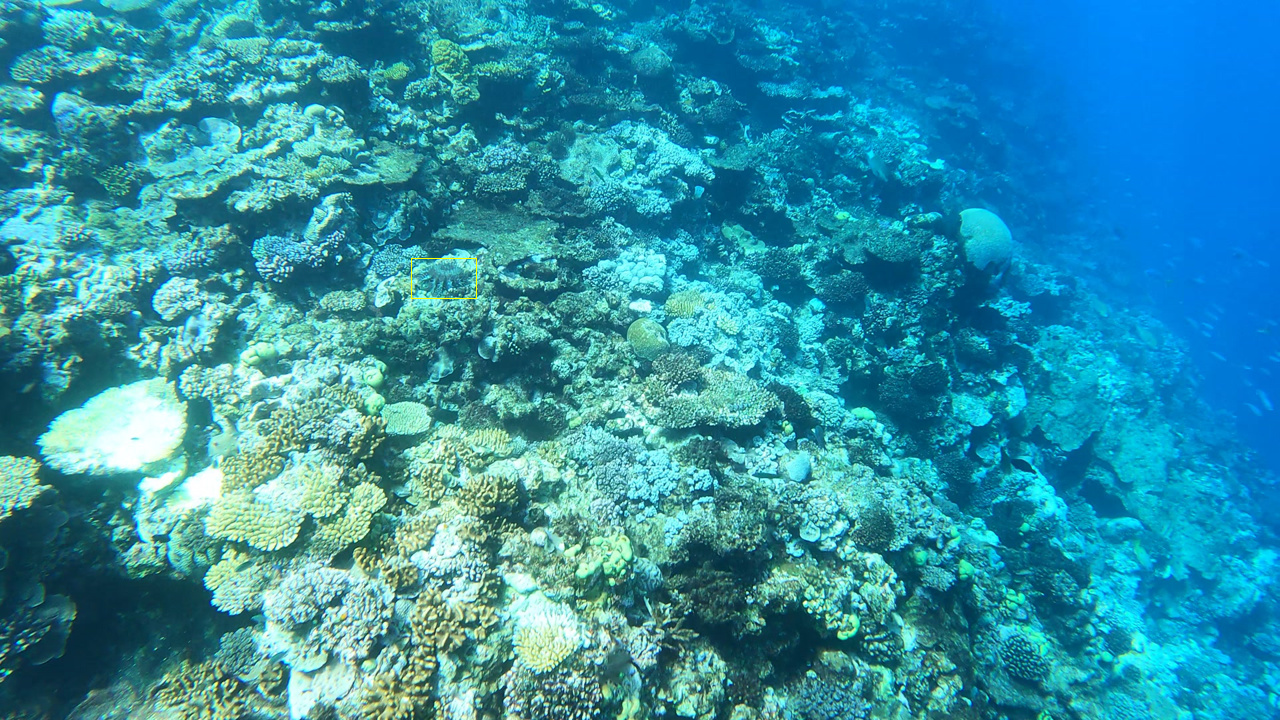

In [ ]:
def image_with_annotation(video_id, video_frame, data_df, image_path):
    """Visualize annotations of a given image."""
    full_path = os.path.join(image_path, os.path.join(f'video_{video_id}', f'{video_frame}.jpg'))
    image = Image.open(full_path)
    draw = ImageDraw.Draw(image)

    rows = data_df[(data_df.video_id == video_id) & (data_df.video_frame == video_frame)]
    for _, row in rows.iterrows():
        annotations = json.loads(row.annotations.replace("'", '"'))
        for annotation in annotations:
            draw.rectangle((
                annotation['x'], 
                annotation['y'],
                (annotation['x'] + annotation['width']), 
                (annotation['y'] + annotation['height']),
                ), outline=(255, 255, 0))
        
    buf = io.BytesIO()
    image.save(buf, 'PNG')
    data = buf.getvalue()

    return data

# Test visualization of a randomly selected image
image_path = os.path.join(INPUT_DIR, 'train_images')
test_index = 55
video_id = train_data_df.iloc[test_index].video_id
video_frame = train_data_df.iloc[test_index].video_frame
IPython.display.Image(image_with_annotation(video_id, video_frame, data_df, image_path))

In [ ]:
from object_detection.utils import dataset_util
from object_detection.dataset_tools import tf_record_creation_util


def create_tf_example(video_id, video_frame, data_df, image_path):
    """Create a tf.Example entry for a given training image."""
    full_path = os.path.join(image_path, os.path.join(f'video_{video_id}', f'{video_frame}.jpg'))
    with tf.io.gfile.GFile(full_path, 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    if image.format != 'JPEG':
        raise ValueError('Image format not JPEG')

    height = image.size[1] # Image height
    width = image.size[0] # Image width
    filename = f'{video_id}:{video_frame}'.encode('utf8') # Unique id of the image.
    encoded_image_data = None # Encoded image bytes
    image_format = 'jpeg'.encode('utf8') # b'jpeg' or b'png'

    xmins = [] # List of normalized left x coordinates in bounding box (1 per box)
    xmaxs = [] # List of normalized right x coordinates in bounding box
             # (1 per box)
    ymins = [] # List of normalized top y coordinates in bounding box (1 per box)
    ymaxs = [] # List of normalized bottom y coordinates in bounding box
             # (1 per box)
    classes_text = [] # List of string class name of bounding box (1 per box)
    classes = [] # List of integer class id of bounding box (1 per box)

    rows = data_df[(data_df.video_id == video_id) & (data_df.video_frame == video_frame)]
    for _, row in rows.iterrows():
        annotations = json.loads(row.annotations.replace("'", '"'))
        for annotation in annotations:
            xmins.append(annotation['x'] / width) 
            xmaxs.append((annotation['x'] + annotation['width']) / width) 
            ymins.append(annotation['y'] / height) 
            ymaxs.append((annotation['y'] + annotation['height']) / height) 

            classes_text.append('COTS'.encode('utf8'))
            classes.append(1)

    tf_example = tf.train.Example(features=tf.train.Features(feature={
      'image/height': dataset_util.int64_feature(height),
      'image/width': dataset_util.int64_feature(width),
      'image/filename': dataset_util.bytes_feature(filename),
      'image/source_id': dataset_util.bytes_feature(filename),
      'image/encoded': dataset_util.bytes_feature(encoded_jpg),
      'image/format': dataset_util.bytes_feature(image_format),
      'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
      'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
      'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
      'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
      'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
      'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    
    return tf_example

def convert_to_tfrecord(data_df, tfrecord_filebase, image_path, num_shards = 10):
    """Convert the object detection dataset to TFRecord as required by the TF ODT API."""
    with contextlib2.ExitStack() as tf_record_close_stack:
        output_tfrecords = tf_record_creation_util.open_sharded_output_tfrecords(
            tf_record_close_stack, tfrecord_filebase, num_shards)
        
        for index, row in data_df.iterrows():
            if index % 500 == 0:
                print('Processed {0} images.'.format(index))
            tf_example = create_tf_example(row.video_id, row.video_frame, data_df, image_path)
            output_shard_index = index % num_shards
            output_tfrecords[output_shard_index].write(tf_example.SerializeToString())
        
        print('Completed processing {0} images.'.format(len(data_df)))

!mkdir new_dataset
image_path = os.path.join(INPUT_DIR, 'train_images')

# Convert train images to TFRecord
print('Converting TRAIN images...')
convert_to_tfrecord(
  train_data_df,
  'new_dataset/cots_train',
  image_path,
  num_shards = 4
)

# Convert validation images to TFRecord
print('Converting VALIDATION images...')
convert_to_tfrecord(
  val_data_df,
  'new_dataset/cots_val',
  image_path,
  num_shards = 4
)

Converting TRAIN images...
Processed 0 images.
Processed 500 images.
Processed 1000 images.
Processed 1500 images.
Processed 2000 images.
Processed 2500 images.
Processed 3000 images.
Processed 3500 images.
Processed 4000 images.
Completed processing 4271 images.
Converting VALIDATION images...
Processed 0 images.
Processed 500 images.
Completed processing 648 images.


In [ ]:
# Create a label map to map between label index and human-readable label name.

label_map_str = """item {
  id: 1
  name: 'COTS'
}"""

with open('new_dataset/label_map.pbtxt', 'w') as f:
  f.write(label_map_str)

!more dataset/label_map.pbtxt

item {
  id: 1
  name: 'COTS'
}


In [ ]:
!zip -r new_dataset.zip ./new_dataset

  adding: new_dataset/ (stored 0%)
  adding: new_dataset/cots_train-00000-of-00004 (deflated 0%)
  adding: new_dataset/cots_train-00001-of-00004 (deflated 0%)
  adding: new_dataset/cots_train-00002-of-00004 (deflated 0%)
  adding: new_dataset/cots_train-00003-of-00004 (deflated 0%)
  adding: new_dataset/cots_val-00000-of-00004 (deflated 0%)
  adding: new_dataset/cots_val-00001-of-00004 (deflated 0%)
  adding: new_dataset/cots_val-00002-of-00004 (deflated 0%)
  adding: new_dataset/cots_val-00003-of-00004 (deflated 0%)
  adding: new_dataset/label_map.pbtxt (stored 0%)


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
!tar xvf efficientdet_d1_coco17_tpu-32.tar.gz

--2022-06-09 15:52:12--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.191.128, 2607:f8b0:4001:c0d::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.191.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘efficientdet_d1_coco17_tpu-32.tar.gz’

efficientdet_d1_coc 100%[===================>]  49.44M  50.6MB/s    in 1.0s    

2022-06-09 15:52:13 (50.6 MB/s) - ‘efficientdet_d1_coco17_tpu-32.tar.gz’ saved [51839363/51839363]

efficientdet_d1_coco17_tpu-32/
efficientdet_d1_coco17_tpu-32/checkpoint/
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d1_coco17_tpu-32/pipeline.config
efficientdet_d1_coco17_tpu-32/saved_model/
efficientdet_

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 17.3 MB/s 


Before Training, I had used 7 types of Bounding Box Augmentation. Check the pipeling config

In [ ]:
PIPELINE_CONFIG_PATH = 'new_dataset/pipeline.config' 
MODEL_DIR='EfficientDet_D1'
!mkdir {MODEL_DIR}
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --alsologtostderr

mkdir: cannot create directory ‘EfficientDet_D1’: File exists
2022-06-10 14:50:34.544385: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0610 14:50:34.558156 140509493921664 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0610 14:50:34.566445 140509493921664 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 14:50:34.566615 140509493921664 config_util.py:552] Maybe overwriting use_bfloat16: False
I0610 14:50:34.590173 140509493921664 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b1
I0610 14:50:34.590320 140

In [ ]:
!python models/research/object_detection/exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_dir={MODEL_DIR} \
    --output_directory={MODEL_DIR}/output

2022-06-10 16:09:52.961601: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0610 16:09:52.975880 139655119038336 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b1
I0610 16:09:52.976077 139655119038336 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 88
I0610 16:09:52.976152 139655119038336 ssd_efficientnet_bifpn_feature_extractor.py:149] EfficientDet BiFPN num iterations: 4
I0610 16:09:52.979830 139655119038336 efficientnet_model.py:147] round_filter input=32 output=32
I0610 16:09:53.004727 139655119038336 efficientnet_model.py:147] round_filter input=32 output=32
I0610 16:09:53.004842 139655119038336 efficientnet_model.py:147] round_filter input=16 output=16
I0610 16:09:53.118158 139655119038336 efficientnet_model.py:147] round_filter input=16 output=16
I

In [ ]:
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={PIPELINE_CONFIG_PATH} \
    --model_dir={MODEL_DIR} \
    --checkpoint_dir={MODEL_DIR} \
    --eval_timeout=0 \
    --alsologtostderr

W0610 16:12:32.318616 140510700918656 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0610 16:12:32.318828 140510700918656 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 16:12:32.318915 140510700918656 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0610 16:12:32.318993 140510700918656 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0610 16:12:32.319108 140510700918656 model_lib_v2.py:1110] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-06-10 16:12:33.042552: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi